In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
from scipy import stats

In [3]:
df=pd.read_csv("../data/spec_in_std.csv")
# df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['funnel_100']=df['funnel_01']+df['funnel_10']


In [4]:
df['전체_이벤트'].describe()


count    2.539320e+05
mean    -4.228963e-13
std      1.000000e+00
min     -2.102675e+00
25%     -7.620446e-01
50%     -9.958666e-02
75%      6.625613e-01
max      5.319655e+00
Name: 전체_이벤트, dtype: float64

In [5]:
df=df[df['전체_이벤트']>=-0.7620446]

In [6]:
df.describe()

,유저_번호,고유_일자,첫_로그_일자,마지막_로그_일자,운영체제_갯수,앱_실행,조회_전환_시간,방문일자비율,앱실행비율,세션당_한도조회_시작하기_버튼_클릭,...,UVG,GVU,funnel_01,funnel_10,funnel_21,funnel_32,funnel_10_hesitate_mean,funnel_21_hesitate_sec_mean,funnel_32_hesitate_sec_mean,funnel_100
count,194268.000000,194268.000000,194268.000000,194268.000000,194268.000000,194268.000000,194268.000000,194268.000000,194268.000000,194268.000000,...,194268.000000,194268.000000,194268.000000,194268.000000,194268.000000,194268.000000,194268.000000,194268.000000,194268.000000,194268.000000
mean,440129.818308,0.289096,0.158205,-0.165850,0.031118,0.293831,-0.048836,0.095563,0.112790,0.001018,...,0.045489,0.031431,0.212397,0.196545,0.174646,0.237724,0.122697,0.074872,0.013189,0.408943
std,253900.651959,0.963308,0.937341,0.897251,1.109959,0.962358,0.830511,0.947440,1.058292,1.009865,...,1.126441,1.123748,1.033189,1.046594,1.063792,1.007940,0.962492,0.999086,1.000100,1.934334
min,11.000000,-1.101649,-2.219911,-1.027545,-0.131362,-1.058539,-0.436250,-0.807341,-0.641322,-1.424435,...,-0.166093,-0.118810,-0.905818,-0.828952,-0.744393,-1.076377,-1.993963,-1.738480,-0.852552,-1.734770
25%,220789.750000,-0.362906,-0.481980,-0.823573,-0.131362,-0.468260,-0.436250,-0.476815,-0.426777,-0.689046,...,-0.166093,-0.118810,-0.308294,-0.828952,-0.744393,-0.554741,-0.262502,-0.154461,-0.423381,-1.052138
50%,440031.000000,0.161239,0.479429,-0.497219,-0.131362,0.122020,-0.436250,-0.184744,-0.195062,-0.135894,...,-0.166093,-0.118810,0.155181,-0.146320,0.052622,-0.150128,-0.262502,0.113384,-0.227661,0.008861
75%,660062.250000,0.899982,0.960133,0.318668,-0.131362,0.865684,-0.141384,0.307147,0.233733,0.311216,...,-0.166093,-0.118810,0.854043,0.815796,0.670834,0.702101,1.468958,0.444796,0.052950,1.336756
max,879696.000000,4.669567,1.145020,2.684738,15.187576,7.422997,3.733995,6.348899,28.872494,12.467582,...,30.481521,35.483859,7.938110,7.106017,7.690364,8.843619,1.468958,2.368789,3.868321,14.028353


In [7]:
df.isnull().sum()

유저_번호                          0
고유_일자                          0
첫_로그_일자                        0
마지막_로그_일자                      0
운영체제_갯수                        0
                              ..
funnel_32                      0
funnel_10_hesitate_mean        0
funnel_21_hesitate_sec_mean    0
funnel_32_hesitate_sec_mean    0
funnel_100                     0
Length: 66, dtype: int64

In [8]:
df.columns

Index(['유저_번호', '고유_일자', '첫_로그_일자', '마지막_로그_일자', '운영체제_갯수', '앱_실행', '조회_전환_시간',
       '방문일자비율', '앱실행비율', '세션당_한도조회_시작하기_버튼_클릭', '세션당_한도조회_인트로_페이지_조회',
       '세션당_한도조회_결과_확인', '세션당_대출관리_서비스_이용', '세션당_여윳돈_계산기_서비스_이용', '세션당_로그인',
       '세션당_본인인증완료', '세션당_DSR_계산기_서비스_이용', '세션당_회원가입', '세션당_KCB_신용정보_조회',
       '전체_이벤트', '신청서_갯수', '신청_갯수', 'R', 'F', 'M', '대출희망금액', '기대출수', '기대출금액',
       '신용점수등급', '연소득분위', '입사개월', '나이', '유저_성별', '대출_목적_0', '대출_목적_1',
       '대출_목적_2', '대출_목적_3', '근로형태_0', '근로형태_1', '근로형태_2', '고용형태_0', '고용형태_1',
       '고용형태_2', '주거소유형태_0', '주거소유형태_1', '주거소유형태_2', 'UG', 'GU', 'GV', 'UV',
       'VG', 'UGV', 'GUV', 'VU', 'VUG', 'VGU', 'UVG', 'GVU', 'funnel_01',
       'funnel_10', 'funnel_21', 'funnel_32', 'funnel_10_hesitate_mean',
       'funnel_21_hesitate_sec_mean', 'funnel_32_hesitate_sec_mean',
       'funnel_100'],
      dtype='object')

In [9]:
# # 왜도 3인 설명변수 log1p 변환
# skewd_cols=[]
# for val in df.columns:
#     if abs(df[val].skew()) > 4:
#         # print("log1p 변환이전 : ", abs(df[val].skew()))
#         skewd_cols.append(val)


In [10]:
# for col in skewd_cols:
#     sns.kdeplot(df[col], shade=True)
#     plt.title(col+"의 밀도추정함수: 왜도 "+str(abs(df[col].skew())),fontsize=15)
#     plt.show()

In [11]:
# # 왜도 3인 설명변수 log1p 변환
# for val in df.columns:
#     if abs(df[val].skew()) > 4:
#         df[val] = np.log1p(df[val])

In [12]:
# for col in skewd_cols:
#     sns.kdeplot(df[col], shade=True)
#     plt.title(col+"의 밀도추정함수: 왜도 "+str(abs(df[col].skew())), fontsize=15)
#     plt.show()


In [13]:
def iqr(data):
    q1, q3=np.percentile(data, [25, 75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    
    return np.where((data>upper_bound)|(data<lower_bound))


In [14]:
def z_score(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    z_scores=[(y-mean)/std for y in data]
    
    return np.where(np.abs(z_scores)>threshold)

In [15]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


In [16]:
df=clean_dataset(df)
df_na=df.dropna()
df_na.reset_index(inplace=True, drop=True)
df_na

,유저_번호,고유_일자,첫_로그_일자,마지막_로그_일자,운영체제_갯수,앱_실행,조회_전환_시간,방문일자비율,앱실행비율,세션당_한도조회_시작하기_버튼_클릭,...,UVG,GVU,funnel_01,funnel_10,funnel_21,funnel_32,funnel_10_hesitate_mean,funnel_21_hesitate_sec_mean,funnel_32_hesitate_sec_mean,funnel_100
0,11.0,-0.695089,0.294543,0.645022,-0.131362,-0.468260,-0.436250,-0.656218,-0.486596,-0.213743,...,-0.166093,-0.11881,-0.905818,0.815796,1.175950,0.459977,-0.262502,0.123318,-0.109757,-0.090022
1,12.0,1.045816,0.664315,-0.538013,-0.131362,0.765243,-0.436250,0.142697,-0.041616,0.311216,...,-0.166093,-0.11881,2.293728,1.181575,1.175950,2.068870,-0.262502,-0.056935,-0.100325,3.475304
2,17.0,-0.695089,0.960133,2.439972,-0.131362,-0.468260,-0.436250,-0.706144,-0.529113,1.241242,...,-0.166093,-0.11881,-0.905818,0.383171,0.052622,-0.554741,1.468958,-0.125097,0.090680,-0.522647
3,20.0,0.899982,0.664315,-0.701190,-0.131362,0.959639,-0.436250,0.040497,0.073755,-0.171700,...,-0.166093,-0.11881,0.854043,0.815796,1.175950,0.702101,-0.262502,0.050423,-0.357355,1.669839
4,24.0,-0.695089,-1.554320,-0.415630,-0.131362,-1.058539,-0.309879,-0.029669,-0.443463,0.311216,...,-0.166093,-0.11881,-0.905818,-0.828952,-0.744393,-1.076377,-0.262502,0.223738,1.786138,-1.734770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194263,879689.0,0.375836,-0.149184,-0.741985,-0.131362,0.414158,-0.436250,-0.029669,-0.036536,0.311216,...,-0.166093,-0.11881,0.533868,0.815796,0.670834,0.459977,1.468958,0.540538,3.868321,1.349664
194264,879691.0,0.375836,1.145020,2.154412,-0.131362,1.131109,-0.436250,-0.356663,0.066884,0.311216,...,-0.166093,-0.11881,0.533868,0.815796,1.175950,0.459977,-0.262502,0.206579,-0.100325,1.349664
194265,879692.0,-0.082050,-0.629889,0.441050,-0.131362,-0.049450,-0.436250,-0.146390,-0.159247,0.311216,...,-0.166093,-0.11881,-0.308294,-0.146320,0.052622,0.180465,1.468958,0.303423,-0.173425,-0.454614
194266,879693.0,-0.362906,-1.554320,-0.578807,-0.131362,-0.243846,-0.436250,0.393740,0.280904,2.757479,...,-0.166093,-0.11881,1.131391,1.498428,0.670834,-0.150128,-0.262502,-0.201110,0.392514,2.629819


In [17]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# #표준화
# sc = StandardScaler()
# df_scaled = sc.fit_transform(df_na.drop(['유저_번호'], axis=1))
# df_scaled=pd.DataFrame(df_scaled) #mean~min, mem_period 5개 변수가 표준화됨.
# df_scaled.columns = df_na.drop(['유저_번호'], axis=1).columns
# df_scaled['유저_번호'] = df_na['유저_번호']
# df_scaled


In [18]:
X=df_na.drop(['유저_번호'], axis=1)

Text(0.5, 1.0, 'Iris feature correlation matrix')

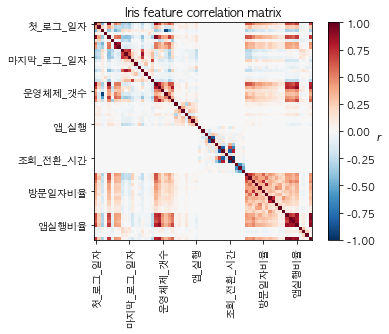

In [19]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)
# ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(X.columns), rotation=90)
# ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(X.columns))


plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")



In [20]:
X.columns, len((X.columns))

(Index(['고유_일자', '첫_로그_일자', '마지막_로그_일자', '운영체제_갯수', '앱_실행', '조회_전환_시간',
        '방문일자비율', '앱실행비율', '세션당_한도조회_시작하기_버튼_클릭', '세션당_한도조회_인트로_페이지_조회',
        '세션당_한도조회_결과_확인', '세션당_대출관리_서비스_이용', '세션당_여윳돈_계산기_서비스_이용', '세션당_로그인',
        '세션당_본인인증완료', '세션당_DSR_계산기_서비스_이용', '세션당_회원가입', '세션당_KCB_신용정보_조회',
        '전체_이벤트', '신청서_갯수', '신청_갯수', 'R', 'F', 'M', '대출희망금액', '기대출수', '기대출금액',
        '신용점수등급', '연소득분위', '입사개월', '나이', '유저_성별', '대출_목적_0', '대출_목적_1',
        '대출_목적_2', '대출_목적_3', '근로형태_0', '근로형태_1', '근로형태_2', '고용형태_0', '고용형태_1',
        '고용형태_2', '주거소유형태_0', '주거소유형태_1', '주거소유형태_2', 'UG', 'GU', 'GV', 'UV',
        'VG', 'UGV', 'GUV', 'VU', 'VUG', 'VGU', 'UVG', 'GVU', 'funnel_01',
        'funnel_10', 'funnel_21', 'funnel_32', 'funnel_10_hesitate_mean',
        'funnel_21_hesitate_sec_mean', 'funnel_32_hesitate_sec_mean',
        'funnel_100'],
       dtype='object'),
 65)

In [21]:
corr_df = X.corr(method='pearson')
corr_cols=corr_df.columns
for i in range(len(corr_df)):
    for j in range(len(corr_df)-1, i, -1):
        if abs(corr_df.iloc[i].iloc[j])>0.8 and i!=j:
            print((corr_cols[i], corr_cols[j]), corr_df.iloc[i].iloc[j])


('고유_일자', '전체_이벤트') 0.864193770762831
('고유_일자', '앱_실행') 0.9132180942167711
('마지막_로그_일자', 'R') -0.9249358624885073
('앱_실행', '전체_이벤트') 0.9243013792073898
('방문일자비율', '앱실행비율') 0.8483490051367577
('세션당_한도조회_인트로_페이지_조회', '세션당_본인인증완료') 0.8281990833622282
('신청서_갯수', 'funnel_100') 0.8109637228960107
('신청서_갯수', 'funnel_32') 0.8829578590727247
('신청서_갯수', 'M') 0.8047571508315577
('대출_목적_2', '대출_목적_3') -0.849135862366163
('근로형태_1', '근로형태_2') -0.825871877418695
('근로형태_2', '고용형태_1') -0.8199014982976548
('고용형태_1', '고용형태_2') -0.9666728182347866
('UV', 'GUV') 0.8316055201759451
('funnel_01', 'funnel_100') 0.9291239497481047
('funnel_01', 'funnel_32') 0.8617498423861603
('funnel_10', 'funnel_100') 0.930994773903934
('funnel_10', 'funnel_32') 0.8161206581735695
('funnel_10', 'funnel_21') 0.9209462451834475
('funnel_21', 'funnel_100') 0.8503805647554091
('funnel_21', 'funnel_32') 0.8229790130073529
('funnel_32', 'funnel_100') 0.9018593905077646


- [고유_일자] 살리고 [전체_이벤트, 앱_실행] 드랍
- [R] 살리고 [마지막_로그_일자] 드랍
- [앱실행비율] 살리고 [방문일자비율] 드랍
- [M] 살리고 [신청서_갯수] 드랍
- [funnel_100] 살리고 [funnel_01, funnel_10, funnel_32, funnel_21] 죽이기
- [세션당_한도조회_인트로_페이지_조회] 살리고 [세션당_본인인증완료]
- [근로형태_2] 살리고 [고용형태_2]
- [UV] 살리고 [GUV] 죽이기
- [대출_목적_2] / [대출_목적_3]
- [근로형태_2] / [고용형태_1, 근로형태_1, 고용형태_2]


In [22]:
drop_cols=['운영체제_갯수','전체_이벤트', '앱_실행','신청서_갯수','앱실행비율', 'funnel_01', 'funnel_10', 'funnel_32', 'funnel_21', 
           '세션당_본인인증완료','고용형태_2', 'GUV', '마지막_로그_일자', '대출_목적_3', '고용형태_1', '근로형태_1', '고용형태_2']
X_corred=X.drop(drop_cols, axis=1)
len(X_corred.columns)

49

In [23]:
corr_df = X_corred.corr(method='pearson')
corr_cols = corr_df.columns
for i in range(len(corr_df)):
    for j in range(len(corr_df)-1, i, -1):
        if abs(corr_df.iloc[i].iloc[j]) > 0.7 and i != j:
            print((corr_cols[i], corr_cols[j]), corr_df.iloc[i].iloc[j])

('고유_일자', 'funnel_100') 0.7033402472633117
('세션당_한도조회_시작하기_버튼_클릭', '세션당_한도조회_결과_확인') 0.7469385518677822
('UG', 'GU') 0.7334456964836016
('GV', 'UGV') 0.7381291928892407
('VU', 'VUG') 0.7621706135916009


Text(0.5, 1.0, 'Iris feature correlation matrix')

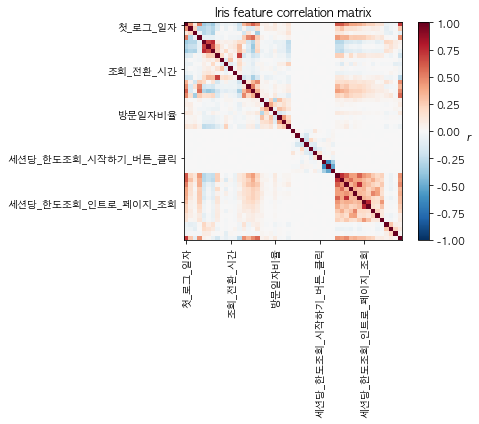

In [24]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X_corred.T), cmap="RdBu_r", vmin=-1, vmax=1)

# ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(X_corred.columns), rotation=90)
# ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(X_corred.columns))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")


### 도저히 안 되겠어서 좀 분할해봄


In [25]:
X_corred.columns

Index(['고유_일자', '첫_로그_일자', '조회_전환_시간', '방문일자비율', '세션당_한도조회_시작하기_버튼_클릭',
       '세션당_한도조회_인트로_페이지_조회', '세션당_한도조회_결과_확인', '세션당_대출관리_서비스_이용',
       '세션당_여윳돈_계산기_서비스_이용', '세션당_로그인', '세션당_DSR_계산기_서비스_이용', '세션당_회원가입',
       '세션당_KCB_신용정보_조회', '신청_갯수', 'R', 'F', 'M', '대출희망금액', '기대출수', '기대출금액',
       '신용점수등급', '연소득분위', '입사개월', '나이', '유저_성별', '대출_목적_0', '대출_목적_1',
       '대출_목적_2', '근로형태_0', '근로형태_2', '고용형태_0', '주거소유형태_0', '주거소유형태_1',
       '주거소유형태_2', 'UG', 'GU', 'GV', 'UV', 'VG', 'UGV', 'VU', 'VUG', 'VGU',
       'UVG', 'GVU', 'funnel_10_hesitate_mean', 'funnel_21_hesitate_sec_mean',
       'funnel_32_hesitate_sec_mean', 'funnel_100'],
      dtype='object')

In [26]:
X_spec = X_corred[['대출희망금액', '기대출수', '기대출금액', '신용점수등급', '연소득분위', '입사개월', '나이',
                   '유저_성별', '대출_목적_0', '대출_목적_1', '대출_목적_2', '근로형태_0', '근로형태_2', '고용형태_0',
                   '주거소유형태_0', '주거소유형태_1', '주거소유형태_2']]

X_log = X_corred[['고유_일자', '첫_로그_일자', '조회_전환_시간', '방문일자비율',
                  '세션당_한도조회_시작하기_버튼_클릭', '세션당_한도조회_인트로_페이지_조회', '세션당_한도조회_결과_확인',
                  '세션당_대출관리_서비스_이용', '세션당_여윳돈_계산기_서비스_이용', '세션당_로그인',
                  '세션당_DSR_계산기_서비스_이용', '세션당_회원가입', '세션당_KCB_신용정보_조회', '신청_갯수', 'R', 'F',
                  'M']]

X_route = X_corred[['UG', 'GU', 'GV', 'UV', 'VG', 'UGV', 'VU', 'VUG', 'VGU', 'UVG', 'GVU', 
                    'funnel_10_hesitate_mean','funnel_21_hesitate_sec_mean', 'funnel_32_hesitate_sec_mean',
                    'funnel_100']]


# PCA, Unrotated FA, Varimax FA

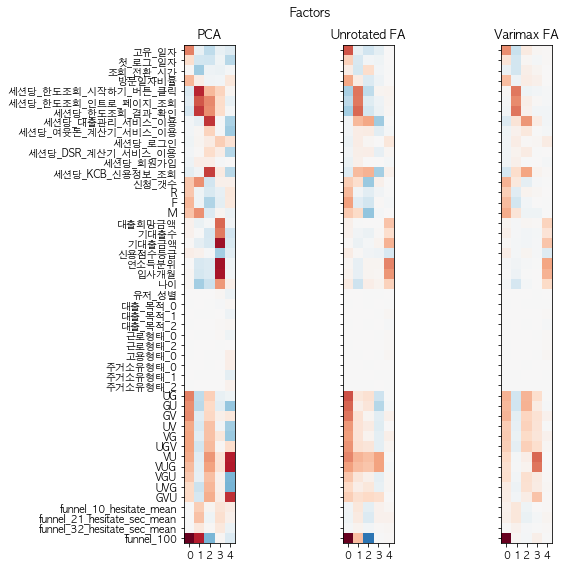

In [27]:
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

n_comps = 5

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X_corred)

    components = fa.components_.T
    # print("\n\n %s :\n" % method)
    # print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(X_corred.columns)))
    if ax.is_first_col():
        ax.set_yticklabels(X_corred.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([x for x in range(0, n_comps)])
    # ax.set_xticklabels([x for x in range(1, 15)])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()


## PCA

In [28]:
from sklearn.decomposition import PCA

max=0
num=0
for i in range(1, 100):
    pca = PCA(n_components=i)  # 주성분을 몇개로 할지 결정
    printcipalComponents = pca.fit_transform(X_corred)
    principalDf = pd.DataFrame(data=printcipalComponents)#, columns=['principal component1', 'principal component2'])
    if sum(pca.explained_variance_ratio_)>max: 
        max=sum(pca.explained_variance_ratio_)
        num=i
        if max>0.75: break
        
print(max, num, len(X_corred.columns))

0.7593909324824909 22 49


In [29]:
from sklearn.decomposition import PCA

max = 0
num = 0
for i in range(1, 100):
    pca = PCA(n_components=i)  # 주성분을 몇개로 할지 결정
    printcipalComponents = pca.fit_transform(X_spec)
    # , columns=['principal component1', 'principal component2'])
    principalDf = pd.DataFrame(data=printcipalComponents)
    if sum(pca.explained_variance_ratio_) > max:
        max = sum(pca.explained_variance_ratio_)
        num = i
        if max > 0.75:
            break

print(max, num, len(X_spec.columns))


0.7721568457414859 10 17


In [30]:
from sklearn.decomposition import PCA

max = 0
num = 0
for i in range(1, 100):
    pca = PCA(n_components=i)  # 주성분을 몇개로 할지 결정
    printcipalComponents = pca.fit_transform(X_log)
    # , columns=['principal component1', 'principal component2'])
    principalDf = pd.DataFrame(data=printcipalComponents)
    if sum(pca.explained_variance_ratio_) > max:
        max = sum(pca.explained_variance_ratio_)
        num = i
        if max > 0.75:
            break

print(max, num, len(X_log.columns))


0.7522607645768501 7 17


In [31]:
from sklearn.decomposition import PCA

max = 0
num = 0
for i in range(1, 100):
    pca = PCA(n_components=i)  # 주성분을 몇개로 할지 결정
    printcipalComponents = pca.fit_transform(X_route)
    # , columns=['principal component1', 'principal component2'])
    principalDf = pd.DataFrame(data=printcipalComponents)
    if sum(pca.explained_variance_ratio_) > max:
        max = sum(pca.explained_variance_ratio_)
        num = i
        if max > 0.75:
            break

print(max, num, len(X_route.columns))

X_cluster=principalDf.copy()


0.7848025478359165 7 15


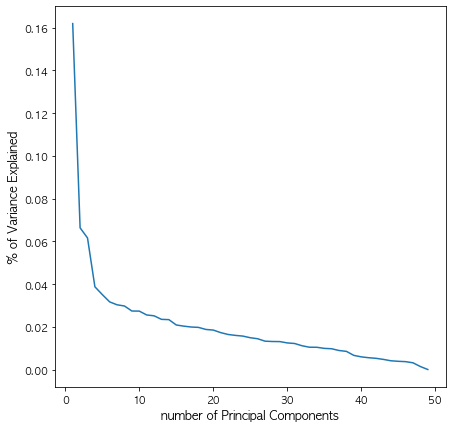

In [32]:
pca = PCA(random_state=0)
pca.fit_transform(X_corred)
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(range(1, X_corred.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel("number of Principal Components", fontsize=12)
plt.ylabel("% of Variance Explained", fontsize=12)
plt.show()


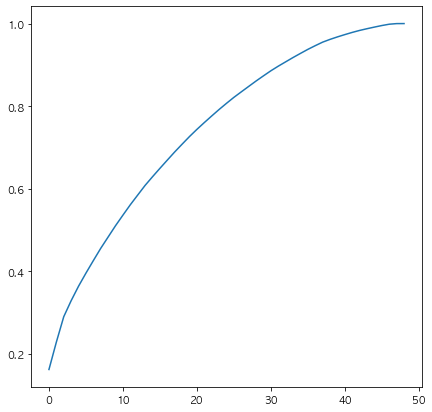

In [33]:
# PCA 주성분분석 차원 갯수  늘어날  때 마다의 설명력
pca = PCA(random_state=0)
X_p = pca.fit_transform(X_corred)

plt.plot(np.cumsum(pca.explained_variance_ratio_))


## Varimax

#### Varimax를 위한 검정

In [34]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from factor_analyzer import FactorAnalyzer

chi_square_value, p_value=calculate_bartlett_sphericity(X_corred)
chi_square_value, p_value

(4043853.863530438, 0.0)

In [35]:
kmo_all, kmo_model=calculate_kmo(X_spec) # X_spec은 kmo가 되게 안 좋음..!!
kmo_model

0.34973101837392456

In [36]:
# Unrotated FA
fa=FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(X_corred)
ev, v=fa.get_eigenvalues()
ev

array([6.54418281e+00, 3.28803380e+00, 2.74021423e+00, 2.04897609e+00,
       1.73392972e+00, 1.67764790e+00, 1.53008931e+00, 1.45628497e+00,
       1.45234934e+00, 1.37956435e+00, 1.35267471e+00, 1.26262952e+00,
       1.24352238e+00, 1.22455203e+00, 1.06490359e+00, 1.05778684e+00,
       1.01502234e+00, 9.79622836e-01, 9.57881172e-01, 9.35284445e-01,
       8.98179719e-01, 8.70378034e-01, 8.45346012e-01, 8.23180929e-01,
       7.40557433e-01, 7.32330917e-01, 7.20413497e-01, 6.97279490e-01,
       6.80650048e-01, 6.62563652e-01, 6.51953754e-01, 5.71628367e-01,
       5.53616614e-01, 5.25061812e-01, 5.12803229e-01, 5.02269215e-01,
       4.20226812e-01, 3.74718134e-01, 3.61467571e-01, 3.00274339e-01,
       2.93461947e-01, 2.65871897e-01, 2.14739420e-01, 2.04304843e-01,
       1.99793987e-01, 1.79725318e-01, 1.61963269e-01, 8.60163637e-02,
       4.07099204e-03])

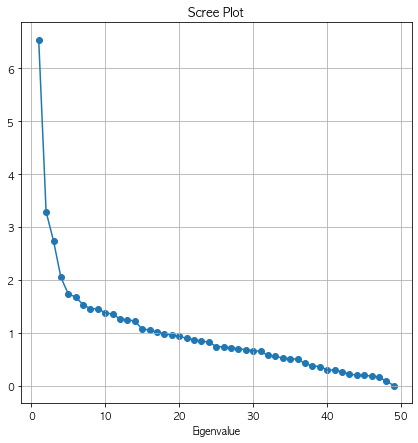

In [37]:
plt.scatter(range(1, X_corred.shape[1]+1), ev)
plt.plot(range(1, X_corred.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Eigenvalue')
plt.grid()
plt.show() # X_corred 5개, X_log 3개, X_route 2개

In [38]:
# Varimax FA
fa=FactorAnalyzer(n_factors=5, rotation="varimax")
fa.fit(X_corred)
efa_result=pd.DataFrame(fa.loadings_, index=X_corred.columns)
efa_result

,0,1,2,3,4
고유_일자,0.660131,0.503844,-0.134611,0.292522,-0.002053
첫_로그_일자,0.189133,-0.080055,-0.214542,0.908465,0.012015
조회_전환_시간,0.055909,-0.094236,-0.415912,0.050414,0.010807
방문일자비율,0.479885,0.460041,0.044491,-0.365274,-0.008510
세션당_한도조회_시작하기_버튼_클릭,-0.171085,-0.171038,0.810940,-0.107037,-0.015754
세션당_한도조회_인트로_페이지_조회,-0.041570,-0.325810,0.694074,-0.099762,-0.007593
세션당_한도조회_결과_확인,-0.118782,-0.270912,0.769770,-0.156895,-0.013234
세션당_대출관리_서비스_이용,0.290314,-0.594661,0.076752,-0.257610,0.008414
세션당_여윳돈_계산기_서비스_이용,0.038249,-0.172045,0.040385,-0.013494,-0.003567
세션당_로그인,-0.032864,-0.058695,0.052879,-0.069087,-0.001503


<AxesSubplot:>

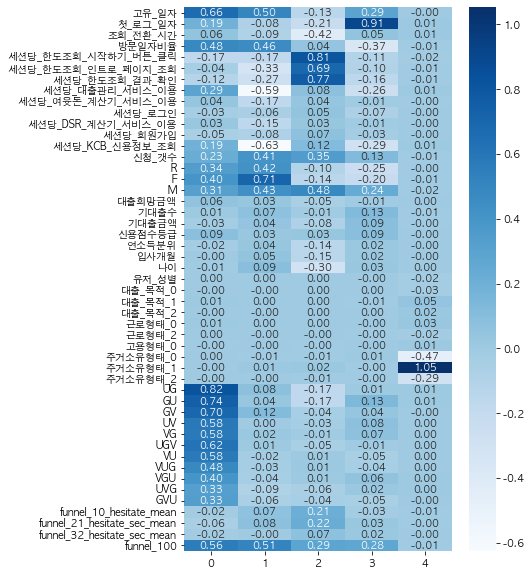

In [39]:
plt.figure(figsize=(6, 10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

In [40]:
fa=FactorAnalyzer(n_factors=23, rotation="varimax")
fa.fit(X_corred) # 최대우도
fa.get_factor_variance()
df1=pd.DataFrame(fa.get_factor_variance())
df1.index=['SS Loadings', 'Proportion Var', 'Cumulative Var']
df1

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
SS Loadings,3.439408,2.626508,2.037943,1.743576,1.630305,1.599061,1.593171,1.568260,1.397076,1.085950,...,0.947474,0.935950,0.910307,0.856080,0.806760,0.657458,0.642282,0.616841,0.479752,0.300066
Proportion Var,0.070192,0.053602,0.041591,0.035583,0.033272,0.032634,0.032514,0.032005,0.028512,0.022162,...,0.019336,0.019101,0.018578,0.017471,0.016464,0.013418,0.013108,0.012589,0.009791,0.006124
Cumulative Var,0.070192,0.123794,0.165385,0.200968,0.234240,0.266873,0.299387,0.331392,0.359904,0.382066,...,0.461304,0.480405,0.498983,0.516454,0.532919,0.546336,0.559444,0.572032,0.581823,0.587947


In [41]:
FAdf=pd.DataFrame(fa.fit_transform(X_corred))
FAdf

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.047352,-0.143298,-0.390648,1.453431,-0.564043,2.103015,-0.132103,0.250047,1.847747,0.146597,...,0.720413,0.461563,-0.164345,-1.310199,0.446832,0.127997,1.992299,0.204680,0.411709,0.215901
1,0.922932,0.635967,-0.374212,-0.734650,-0.072688,-0.724882,-0.870644,0.835953,-0.556582,-0.331217,...,0.426239,-0.460957,-1.591138,0.280009,-1.376358,-0.120766,-0.141438,-0.706133,-0.216409,-0.007862
2,-1.674528,0.837721,-0.044356,-0.306645,1.270980,-0.633966,-0.889887,0.721723,-0.576972,0.004910,...,0.122189,-0.397317,0.242489,-1.354046,0.459402,0.460426,0.007918,-0.434238,0.691695,-0.142121
3,0.618094,-0.239493,-0.314737,-0.594178,-0.662234,-0.935746,-0.157191,0.811946,1.866527,-0.184558,...,0.659981,-0.332348,-0.139380,-0.315256,0.411861,-0.935317,-0.041682,-0.419196,0.248948,0.319903
4,-0.158483,0.410119,-0.177926,-0.394413,-0.473234,1.551809,1.429680,-1.535483,-0.431428,-0.142676,...,0.520020,-0.279071,-0.716014,2.051222,0.554652,0.494955,-0.057318,-0.451901,-0.334591,0.278373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194263,0.104488,0.375520,1.688055,0.862957,0.171324,0.264899,-0.872939,-0.333624,-0.544581,0.662529,...,0.704490,1.565819,0.115852,-1.596920,-1.430734,-1.096011,-0.047005,-0.703963,0.176741,0.895946
194264,-0.476400,-0.277737,-0.379267,1.070528,-0.670627,-1.033626,1.419442,1.146016,-0.428151,-0.018595,...,1.085924,-0.684626,0.229977,0.177767,0.796274,-1.041408,-0.177074,-0.602501,1.334536,0.126920
194265,-0.199836,0.282043,-0.723133,1.512600,-0.962285,0.916302,-0.846422,-0.723661,-0.625337,0.073760,...,1.436073,1.892528,0.611650,0.554077,0.653141,0.795567,-0.014706,0.625183,0.556434,0.780272
194266,0.506600,2.071327,1.931031,-0.680178,0.443330,-0.631955,-0.863080,-1.548274,-0.599547,-0.167831,...,-0.260357,0.967751,-0.718844,-1.775051,0.061431,-1.093317,-0.094105,0.189949,1.323226,-1.159817


- 요인 분석이 10개까지 가도 설명력이 0.38이라 소용이 없음
- 23개까지 가도 0.56

In [ ]:
# a=input("무엇을 선택하시겠습니까? 선택하고 다음 단계로 넘어가시길...FAdf vs principalDf ")

In [42]:
pca_list=[7, 7, 10]
for i in range(3):
    pca = PCA(n_components=pca_list[i])  # 주성분을 몇개로 할지 결정
    if i==0:
        printcipalComponents = pca.fit_transform(X_route)
        X_cluster_r = pd.DataFrame(data=printcipalComponents)
    elif i==1:
        printcipalComponents = pca.fit_transform(X_log)
        X_cluster_l = pd.DataFrame(data=printcipalComponents)
    else:
        printcipalComponents = pca.fit_transform(X_spec)
        X_cluster_s = pd.DataFrame(data=printcipalComponents)


# X_cluster_r=principalDf.copy() # 7
# X_cluster_l=principalDf.copy() # 8
# X_cluster_s=principalDf.copy() # 10
X_cluster_2=FAdf.copy()

# 군집화

In [43]:
import matplotlib as mpl

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rc('axes', unicode_minus=False)  # 유니코드에서 음수 부호 설정
warnings.filterwarnings("ignore")


In [44]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette_kmeans(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : ' + str(n_cluster)+'\n'
                           'Silhouette Score :' + str(round(sil_avg, 3)))
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


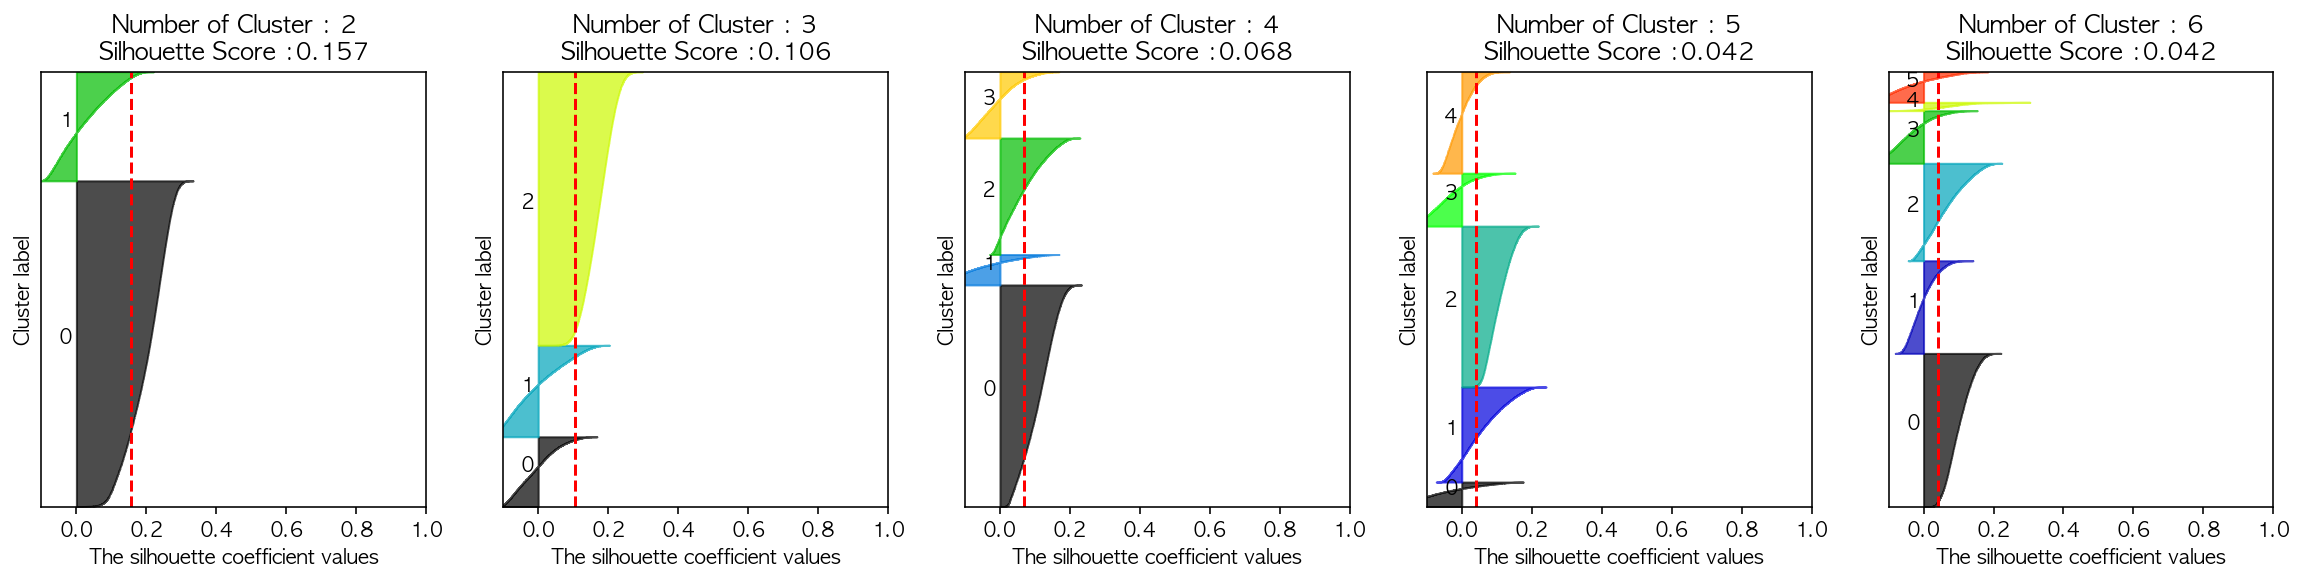

In [45]:
visualize_silhouette_kmeans([2, 3, 4, 5, 6], X_corred) # 88분

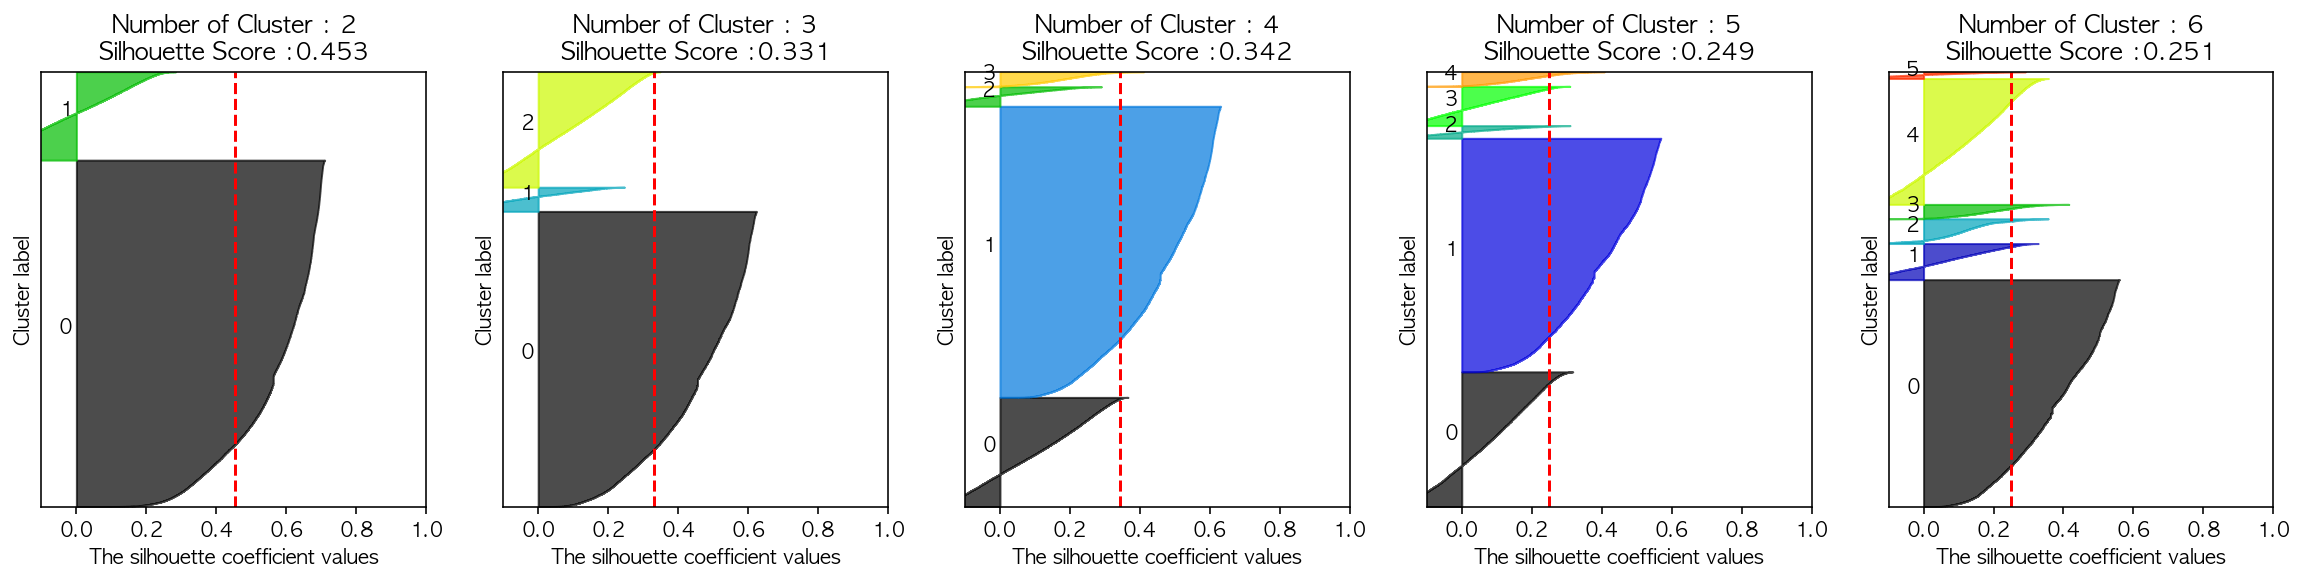

In [46]:
visualize_silhouette_kmeans([2, 3, 4, 5, 6], X_cluster) # 1시간 20분

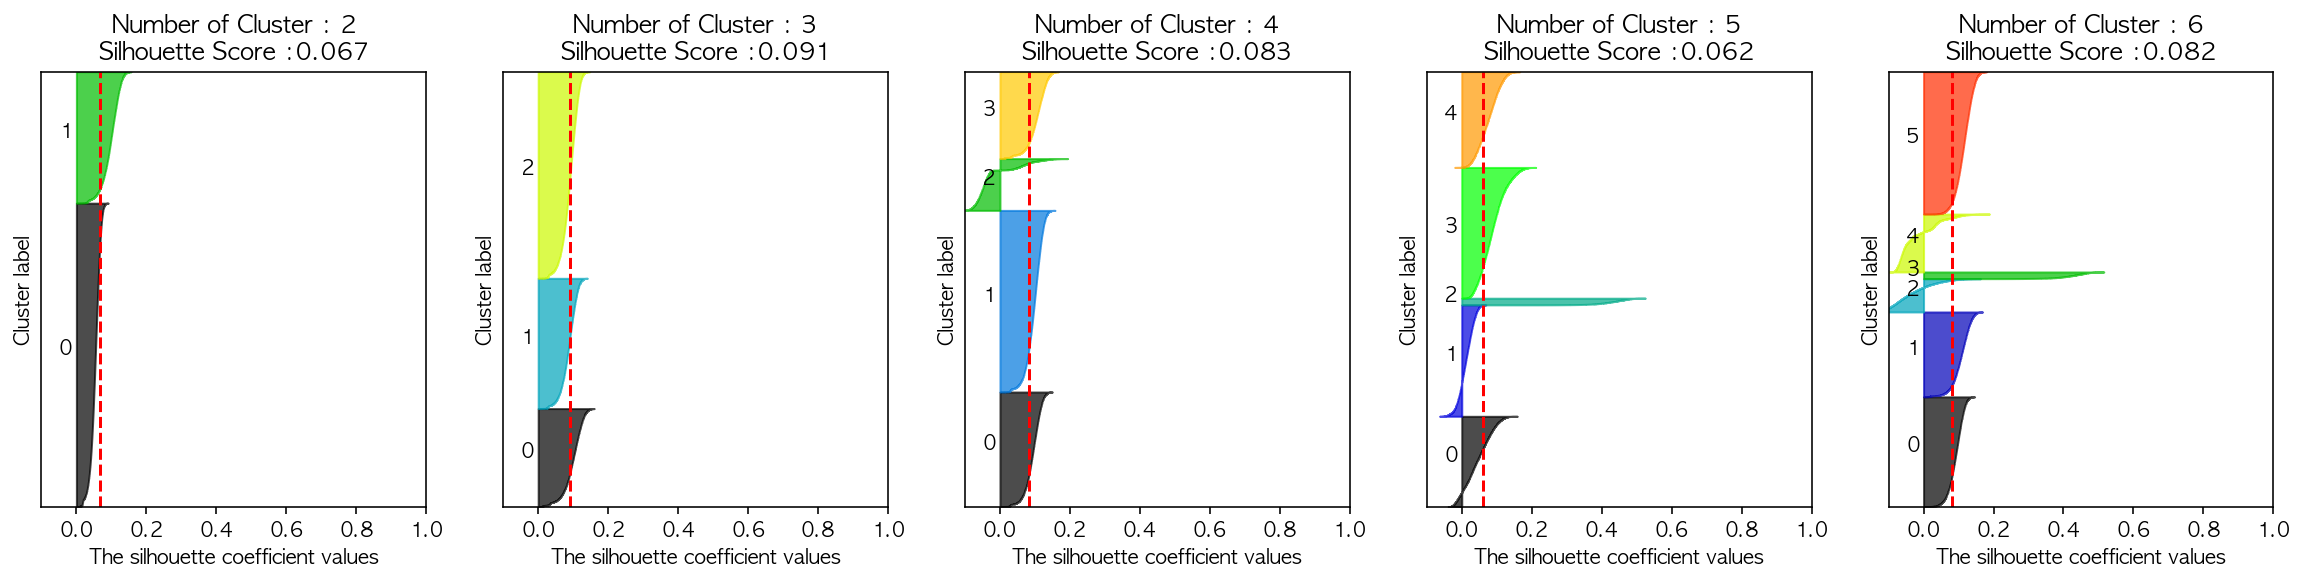

In [47]:
visualize_silhouette_kmeans([2, 3, 4, 5, 6], X_cluster_2) # 80분

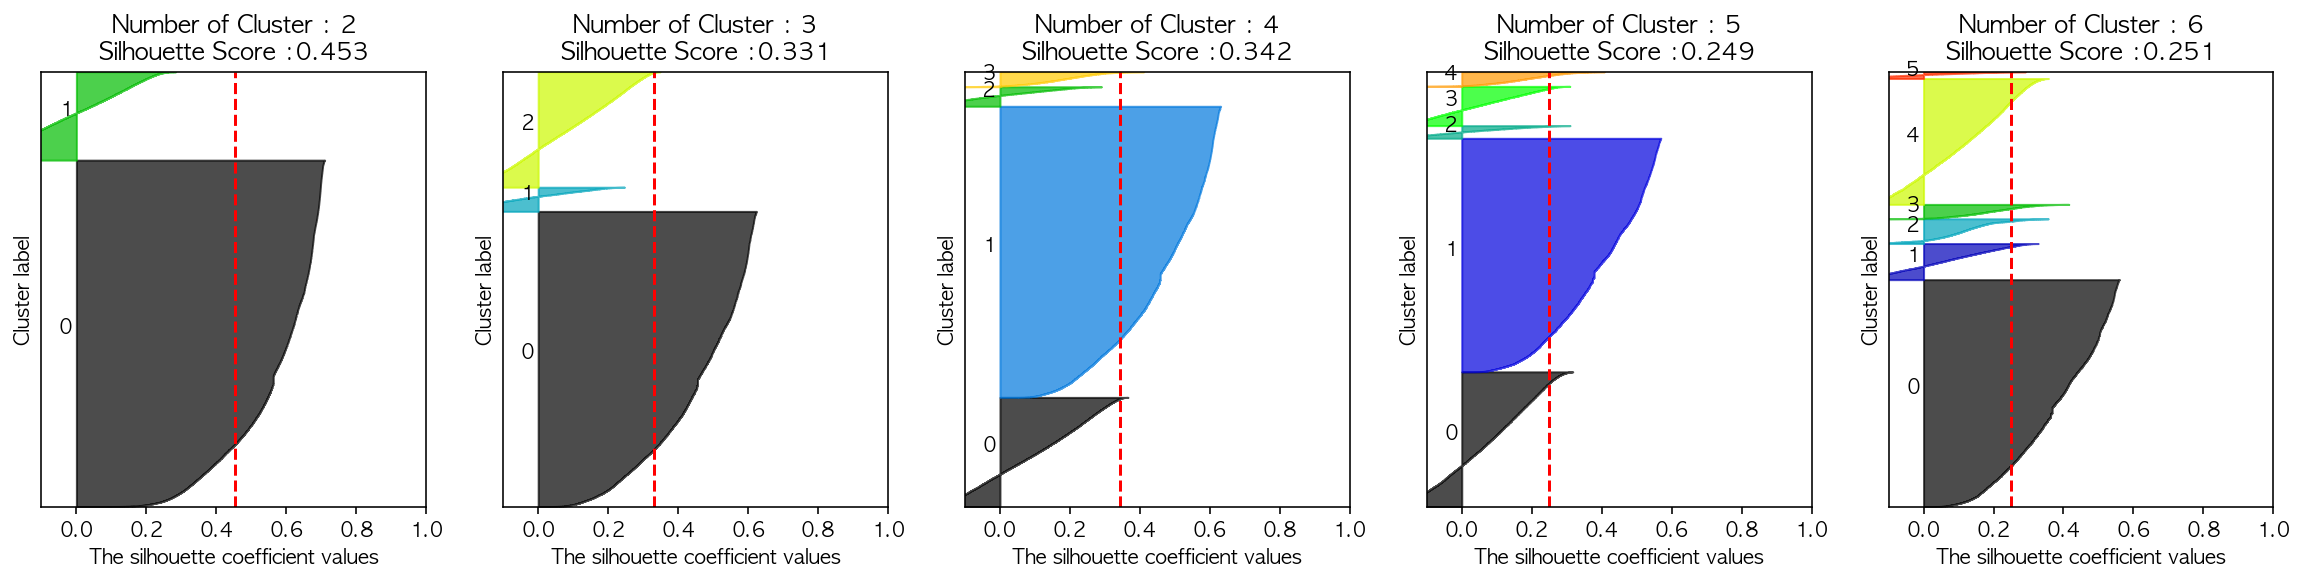

In [48]:
visualize_silhouette_kmeans([2, 3, 4, 5, 6], X_cluster_r) 

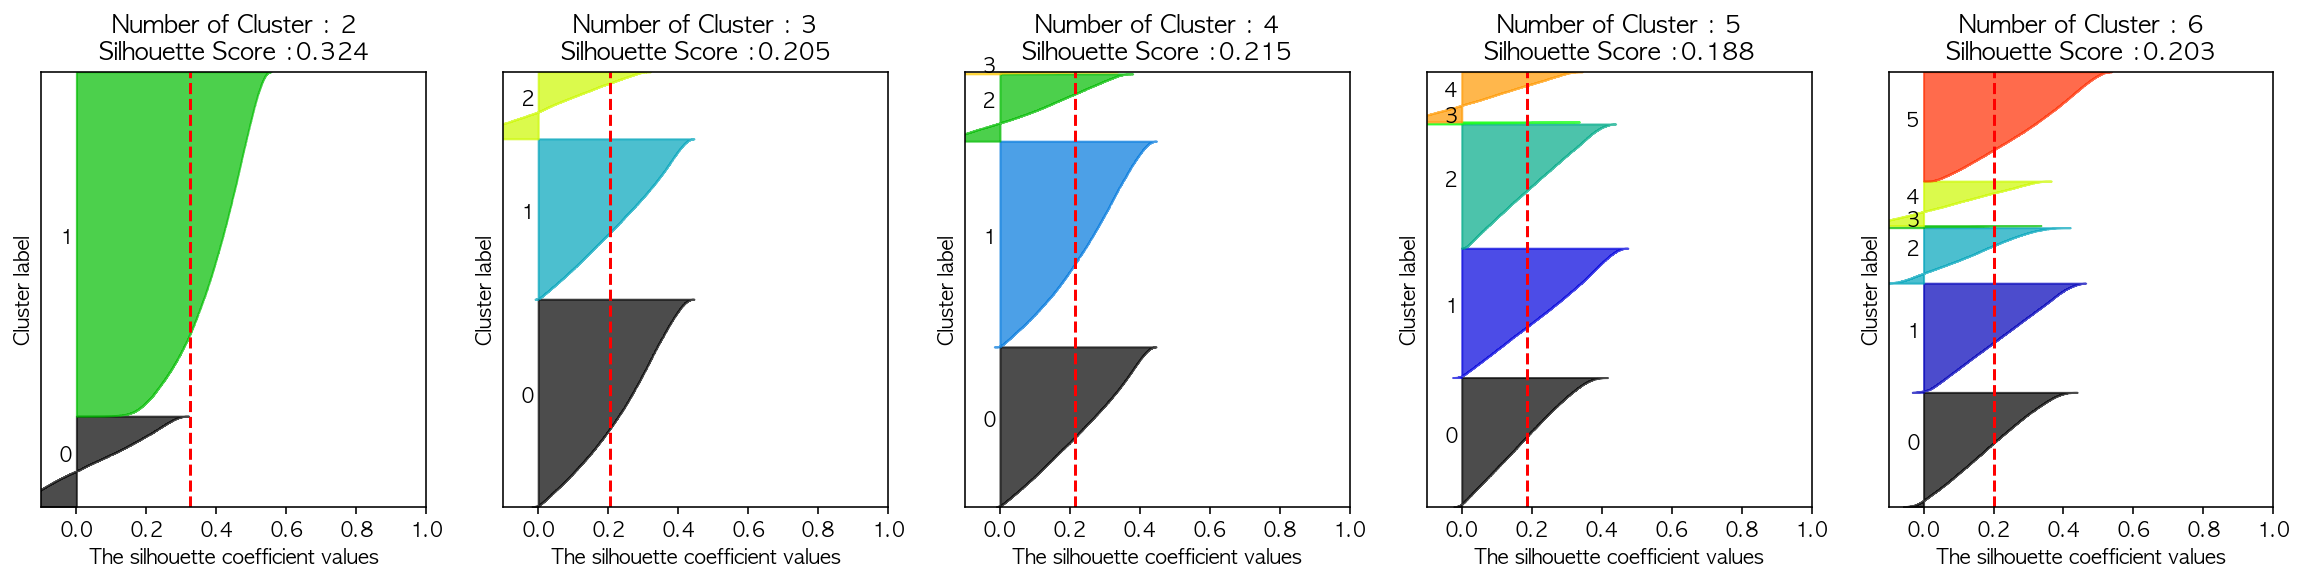

In [49]:
visualize_silhouette_kmeans([2, 3, 4, 5, 6], X_cluster_l) 

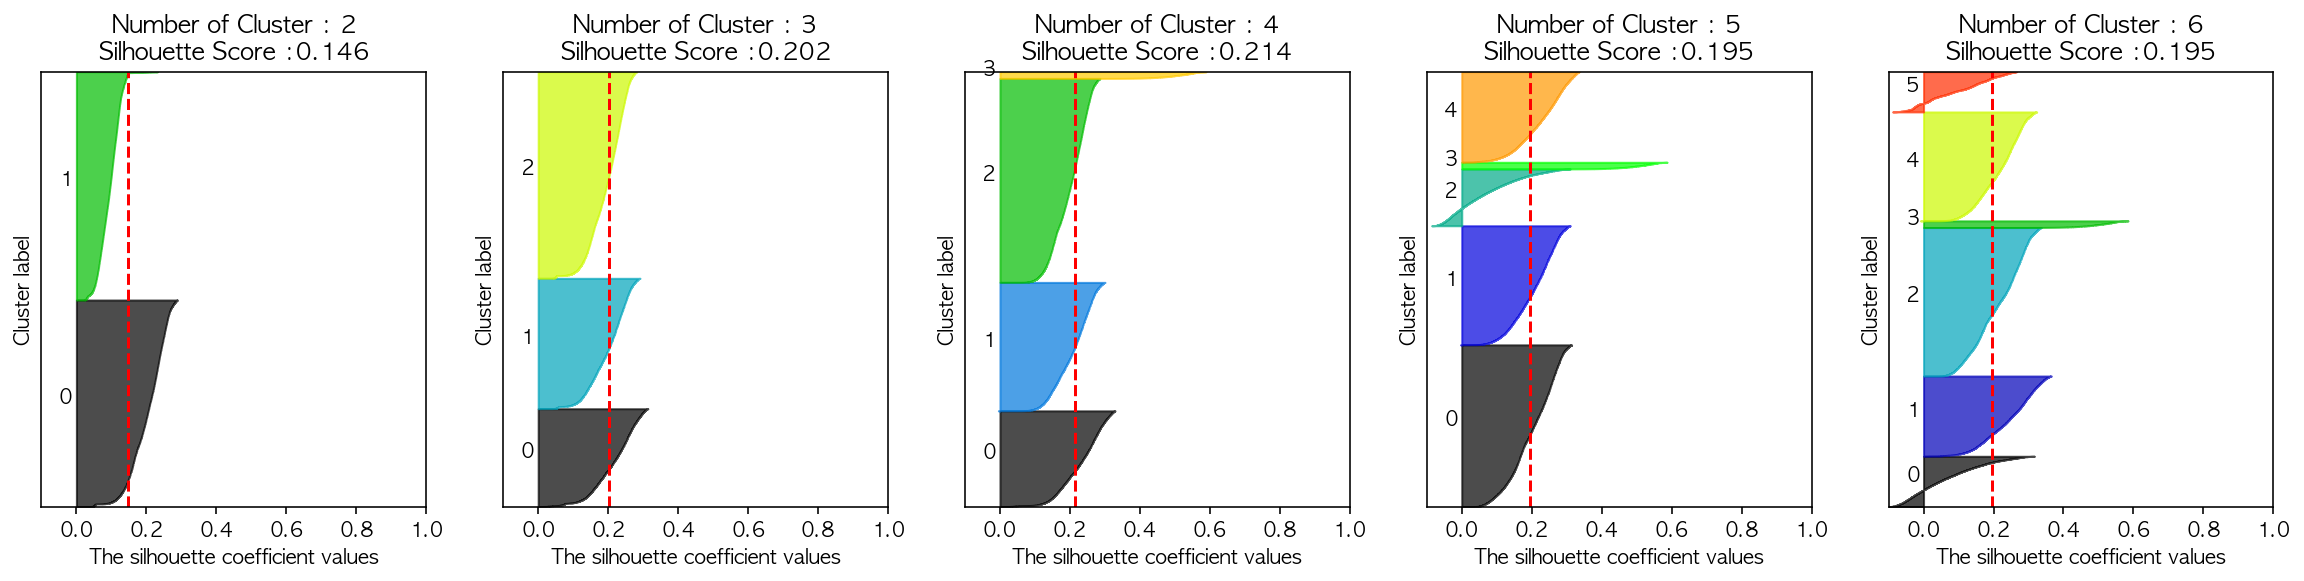

In [50]:
visualize_silhouette_kmeans([2, 3, 4, 5, 6], X_cluster_s)


# 병합 군집

In [48]:
# from sklearn.cluster import AgglomerativeClustering

# cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
# cluster.fit_predict(X)

# DBScan

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import metrics
import math

db = DBSCAN(eps=0.3, min_samples=10).fit(X_corred)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" %
      metrics.silhouette_score(X_corred, labels))


In [ ]:
# epsilon, 최소 샘플 개수 설정
X_cluster_dbscan_c = X_corred.copy()
X_cluster_dbscan_c['cluster'] = db.fit_predict(X_corred)

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, X_cluster_dbscan_c['cluster'].max() + 1):
    plt.scatter(X_cluster_dbscan_c.loc[X_cluster_dbscan_c['cluster'] == i, 'Annual Income (k$)'], X_cluster_dbscan_c.loc[X_cluster_dbscan_c['cluster'] == i, 'Spending Score (1-100)'],
                label='cluster ' + str(i))

plt.legend()


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import metrics
import math

db = DBSCAN(eps=0.3, min_samples=10).fit(X_cluster)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" %
      metrics.silhouette_score(X_cluster, labels))


In [ ]:
# epsilon, 최소 샘플 개수 설정
X_cluster_dbscan = X_cluster.copy()
X_cluster_dbscan['cluster'] = db.fit_predict(X_cluster)

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, X_cluster_dbscan['cluster'].max() + 1):
    plt.scatter(X_cluster_dbscan.loc[X_cluster_dbscan['cluster'] == i, 'Annual Income (k$)'], X_cluster_dbscan.loc[X_cluster_dbscan['cluster'] == i, 'Spending Score (1-100)'],
                label='cluster ' + str(i))

plt.legend()


In [254]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import metrics
import math

db = DBSCAN(eps=0.3, min_samples=10).fit(X_cluster_r)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" %
      metrics.silhouette_score(X_cluster_r, labels))


Estimated number of clusters: 219
Estimated number of noise points: 69090
Silhouette Coefficient: -0.269


In [255]:
# epsilon, 최소 샘플 개수 설정
X_cluster_dbscan_2 = X_cluster_r.copy()
X_cluster_dbscan_2['cluster'] = db.fit_predict(X_cluster_r)

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, X_cluster_dbscan_2['cluster'].max() + 1):
    plt.scatter(X_cluster_dbscan_2.loc[X_cluster_dbscan_2['cluster'] == i, 'Annual Income (k$)'], X_cluster_dbscan_2.loc[X_cluster_dbscan_2['cluster'] == i, 'Spending Score (1-100)'],
                label='cluster ' + str(i))

plt.legend()


KeyError: 'Annual Income (k$)'

# 계층 군집

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X_cluster, 'single')


In [ ]:
labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()
